# Face Recognition with Eigenfaces

**Keywords**: Principal Component Analysis (PCA), Eigenvalues and Eigenvectors

**About the dataset**: \
[*Labeled Faces in the Wild*](http://vis-www.cs.umass.edu/lfw/) dataset consists of face photographs designed for studying the problem of unconstrained face recognition. The original dataset contains more than 13,000 images of faces collected from the web.

**Agenda**:
* In this programming challenge, you will be performing face recognition on the *Labeled Faces in the Wild* dataset using PyTorch.
* First, you will do Principal Component Analysis (PCA) on the image dataset. PCA is used for dimentionality reduction which is a type of unsupervised learning.
* You will be applying PCA on the dataset to extract the principal components (Top $k$ *eigenvalues*).
* As you will see eventually, the reconstruction of faces from these *eigenvalues* will give us the *eigen-faces* which are the most representative features of most of the images in the dataset.
* Finally, you will train a simple PyTorch Neural Network model on the modified image dataset.
* This trained model will be used prediction and evaluation on a test set.



---



In [1]:
# loading the dataset directly from the scikit-learn library (can take about 3-5 mins)
import numpy as np
from sklearn.datasets import fetch_lfw_people
dataset = fetch_lfw_people(min_faces_per_person=80)

# each 2D image is of size 62 x 47 pixels, represented by a 2D array.
# the value of each pixel is a real value from 0 to 255.
count, height, width = dataset.images.shape
print('The dataset type is:',type(dataset.images))
print('The number of images in the dataset:',count)
print('The height of each image:',height)
print('The width of each image:',width)

# sklearn also gives us a flattened version of the images which is a vector of size 62 x 47 = 2914.
# we can directly use that for our exercise
print('The shape of data is:',dataset.data.shape)

The dataset type is: <class 'numpy.ndarray'>
The number of images in the dataset: 1140
The height of each image: 62
The width of each image: 47
The shape of data is: (1140, 2914)


In [2]:
# create target label - target name pairs
targets = [(x,y) for x,y in zip(range(len(np.unique(dataset.target))), dataset.target_names)]
print('The target labels and names are:\n', targets)

The target labels and names are:
 [(0, 'Colin Powell'), (1, 'Donald Rumsfeld'), (2, 'George W Bush'), (3, 'Gerhard Schroeder'), (4, 'Tony Blair')]




---



### **(a) Preprocessing:** Using the `train_test_split` API from sklearn, split the data into train and test dataset in the ratio 3:1. Use `random_state=42`.
### For better performance, it is recommended to normalize the features which can have different ranges with huge values. As all our features here are in the range [0,255],  it is not explicitly needed here. However, it is a good exercise. Use the `StandardScaler` class from sklearn and use that to normalize X_train and X_test. Validate and show your  result by printing the first 5 columns of 5 images of X_train (This result can vary from pc to pc).

In [3]:
X = dataset.data
y = dataset.target

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)
scalar_value = StandardScaler()
X_scalar_train = scalar_value.fit_transform(X_train)
X_scalar_test = scalar_value.fit_transform(X_test)
for i in X_scalar_train[0:5]:
  print(i[0:5])


[-1.0554919  -1.122956   -1.1388202  -0.83775675 -0.73022115]
[2.6176698  2.4660704  1.6026741  0.7748292  0.24043547]
[-1.0632249 -1.0602657 -1.0990884 -1.1078451  1.3383917]
[-0.18166605 -0.21394482 -0.70971674 -1.3779334  -1.3428491 ]
[ 0.05805607  0.00547166 -0.02632988 -0.19431122 -0.04598785]




---



### **(b) Dimentionality reduction** : In this section, use the `PCA` API from sklearn to extract the top 100 principal components of the image matrix and fit it on the training dataset. We can then visualize some of the top few components as an image (eigenfaces).

In [5]:
# initialize PCA API from sklearn with n_components. Also set svd_solver="randomized" and whiten=True in the initialization parameters.
from sklearn.decomposition import PCA
n_components=100
pca= PCA(n_components= 100, whiten=True, svd_solver="randomized")
pca.fit(X_scalar_train)
X_pca = pca.transform(X_scalar_train)

### Now we will plot the most representative eigenfaces:

In [6]:
# function to plot
import matplotlib.pyplot as plt
def plot_gallery(images, titles, height, width, n_row=2, n_col=4):
    plt.figure(figsize=(2* n_col, 3 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

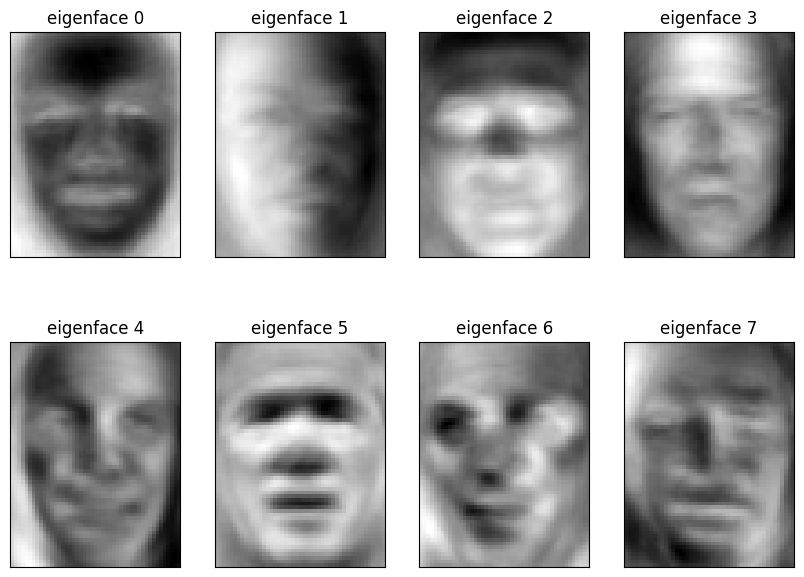

In [7]:
# get the 100 eigen faces and reshape them to original image size which is 62 x 47 pixels
eigenfaces = pca.components_.reshape((n_components, height, width))

# plot the top 8 eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, height, width)

plt.show()



---



### **(c) Face reconstruction:** In this section, we will reconstruct an image from its point projected on the principal component basis. Project the first three faces on the eigenvector basis using PCA models trained with varying number of principal components. Using the projected points, reconstruct the faces, and visualize  the images. Your final output should be a $3\times 5$ image matrix, where the rows are the data points, and the columns correspond to original image and reconstructed image for n_components$=[10,100,150,500]$.

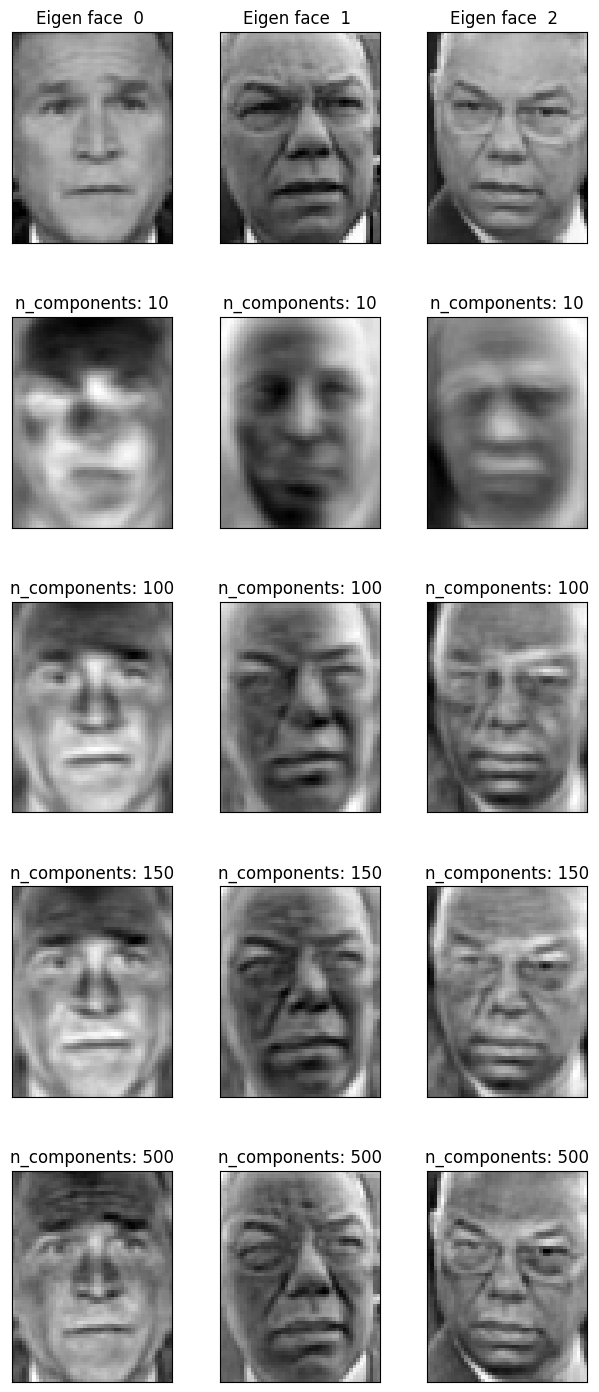

In [8]:
def transform_face(n,height,width):
  pca = PCA(n_components = n, whiten =True, svd_solver="randomized")
  pca_fit_transform=pca.fit_transform(X_scalar_train)
  pca_inverse_transform = pca.inverse_transform(pca_fit_transform)
  return pca_inverse_transform

n_components = [10,100,150,500]
Faces = X_train[0:3,:]
Header = ["Eigen face "+" %d "% i for i in range(3)]

for i in n_components:
  transformed_eigenfaces = transform_face(i, height, width)
  Header=Header+(["n_components: "+ str(i) for j in range(3)])
  Faces=np.concatenate((Faces,transformed_eigenfaces[0:3,:]))

plot_gallery(Faces,Header,height,width,n_row=5,n_col=3)




---



### **(d) Prediction:** In this section, we will train a neural network classifier in **PyTorch** on the transformed dataset. This classifier will help us with the face recognition task. Complete each of the steps below.
### For PyTorch reference see [documentation](https://pytorch.org/docs/stable/index.html).

In [9]:
# define imports here
import torch
import torch.nn as nn

### Before we start training, we need to transform the training and test dataset to reduced forms (100 dimensions) using the pca function defined in (b).
### we will also need to move the train and test dataset to torch tensors in order to work with pytorch.

In [10]:
# project X_train and X_test on orthonormal basis using the PCA API initialized in part (b).
n_components=100
X_train_pca = pca.fit_transform(X_scalar_train)
X_test_pca = pca.transform(X_scalar_test)

# now convert X_train_pca, X_test_pca, y_train and y_test to torch.tensor. For y_train and y_test, set dtype=torch.long
X_train_pca_torch = torch.tensor(X_train_pca)
X_test_pca_torch = torch.tensor(X_test_pca)
y_train_torch = torch.tensor(y_train,dtype=torch.long)
y_test_torch = torch.tensor(y_test,dtype=torch.long)


In [11]:
# We will implement a simple multilayer perceptron (MLP) in pytorch with one hidden layer.
# Using this neural network model, we will train on the transformed dataset.
class MLP(torch.nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    # Initalize various layers of MLP as instructed below
    # initialze two linear layers: 100 -> 1024  and 1024-> 5
    self.l1=nn.Linear(n_components,1024)
    self.l2=nn.Linear(1024,5)
    # initialize relu activation function
    self.relu_actv=nn.ReLU()
    # initialize LogSoftmax
    self.LS_max=nn.LogSoftmax()

  def forward(self, x):
    # define the feedforward algorithm of the model and return the final output
    l1_x=self.l1(x)
    relu_x=self.relu_actv(l1_x)
    l2_x=self.l2(relu_x)
    l2_x=self.LS_max(l2_x)
    return l2_x


In [12]:
# create an instance of the MLP class here
model = MLP()
# define loss (use negative log likelihood loss: torch.nn.NLLLoss)
criterion = torch.nn.NLLLoss()
# define optimizer (use torch.optim.SGD (Stochastic Gradient Descent)).
# Set learning rate to 1e-1 and also set model parameters
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

# train the classifier on the PCA-transformed training data for 500 epochs
# This part is already implemented.
# Go through each step carefully and understand what it does.
for epoch in range(501):
  # reset gradients
  optimizer.zero_grad()

  # predict
  output=model(X_train_pca_torch)

  # calculate loss
  loss=criterion(output, y_train_torch)

  # backpropagate loss
  loss.backward()

  # performs a single gradient update step
  optimizer.step()

  if epoch%50==0:
    print('Epoch: {}, Loss: {:.3f}'.format(epoch, loss.item()))

<ipython-input-11-fbf1598e4a5a>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  l2_x=self.LS_max(l2_x)


Epoch: 0, Loss: 1.663
Epoch: 50, Loss: 0.430
Epoch: 100, Loss: 0.216
Epoch: 150, Loss: 0.132
Epoch: 200, Loss: 0.090
Epoch: 250, Loss: 0.065
Epoch: 300, Loss: 0.050
Epoch: 350, Loss: 0.039
Epoch: 400, Loss: 0.032
Epoch: 450, Loss: 0.027
Epoch: 500, Loss: 0.023


In [13]:
# predict on test data
predictions = model(X_test_pca_torch) # gives softmax logits
y_pred = torch.argmax(predictions, dim=1).numpy() # get the labels from prdictions: nx5 -> nx1

<ipython-input-11-fbf1598e4a5a>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  l2_x=self.LS_max(l2_x)


                   precision    recall  f1-score   support

     Colin Powell       0.93      0.86      0.89        64
  Donald Rumsfeld       0.84      0.81      0.83        32
    George W Bush       0.90      0.96      0.93       127
Gerhard Schroeder       0.93      0.90      0.91        29
       Tony Blair       0.91      0.88      0.89        33

         accuracy                           0.91       285
        macro avg       0.90      0.88      0.89       285
     weighted avg       0.91      0.91      0.90       285



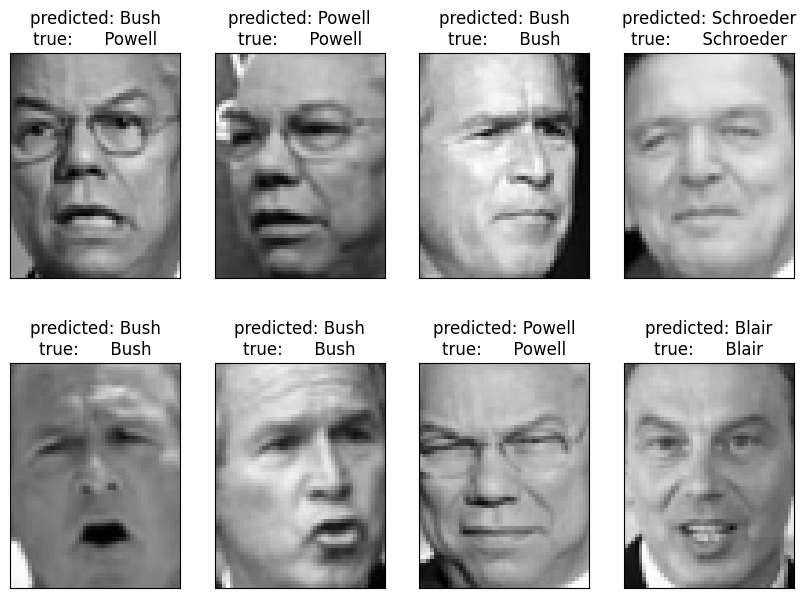

In [14]:
# here, we will print the multi-label classification report: precision, recall, f1-score etc.
from sklearn.metrics import classification_report
target_names=[y for x,y in targets]
print(classification_report(y_test, y_pred, target_names=target_names))

# let us validate some of the predictions by plotting images
# display some of the results
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)

prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, height, width)



---

